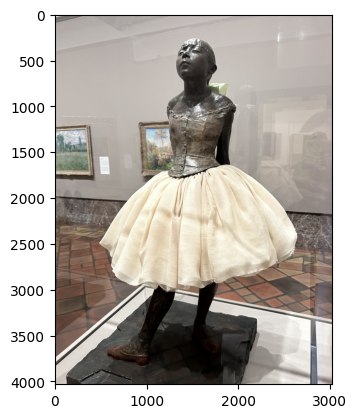

In [3]:
from skimage import graph, data, io, segmentation, color
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import numpy as np
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("LittleDancer.jpg")
A = np.asarray(img)
plt.imshow(A)

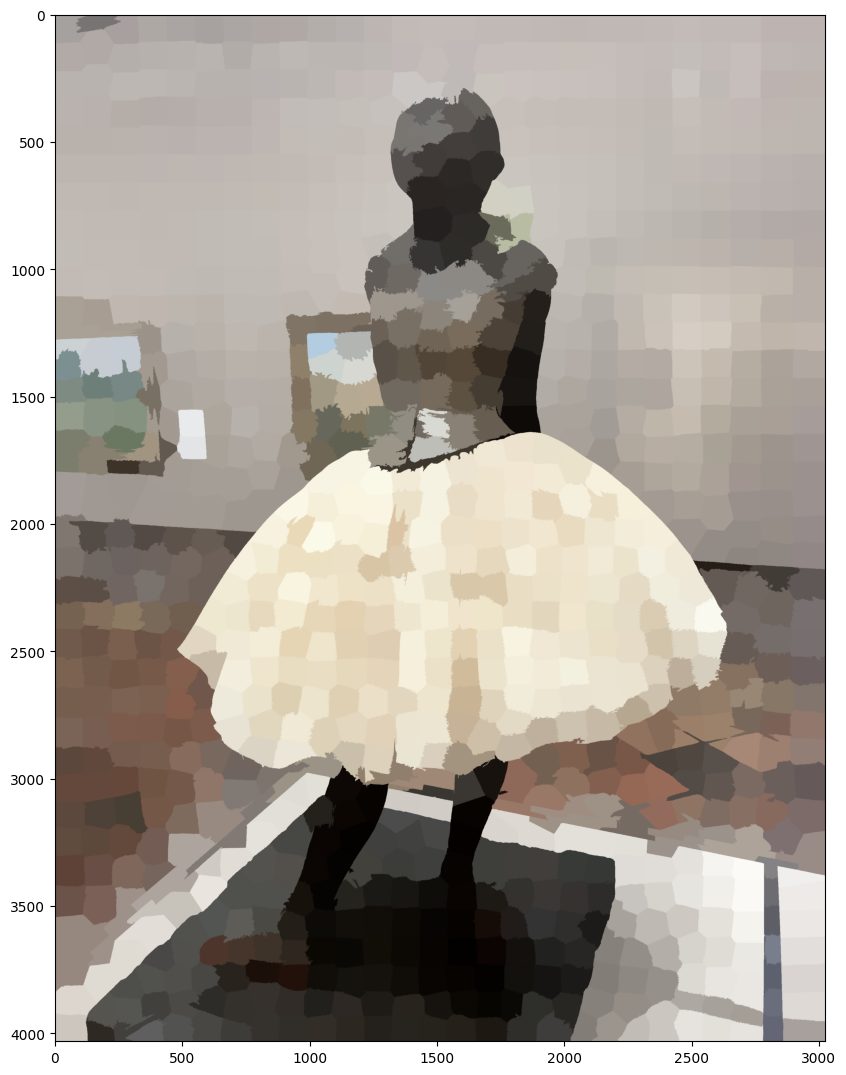

In [8]:
def show_img(img):
    width = 10.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)

labels = segmentation.slic(A, compactness=30, n_segments=1000)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, A, kind='avg')
show_img(label_rgb)

In [9]:
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image

    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.

    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.

    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    #for edge in g.edges_iter():
    for edge in g.edges():
        n1, n2 = edge

        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])

        line  = draw.line(r1, c1, r2, c2)
        circle = draw.disk((r1,c1),2)

        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        image[circle] = 1,1,0

    return image

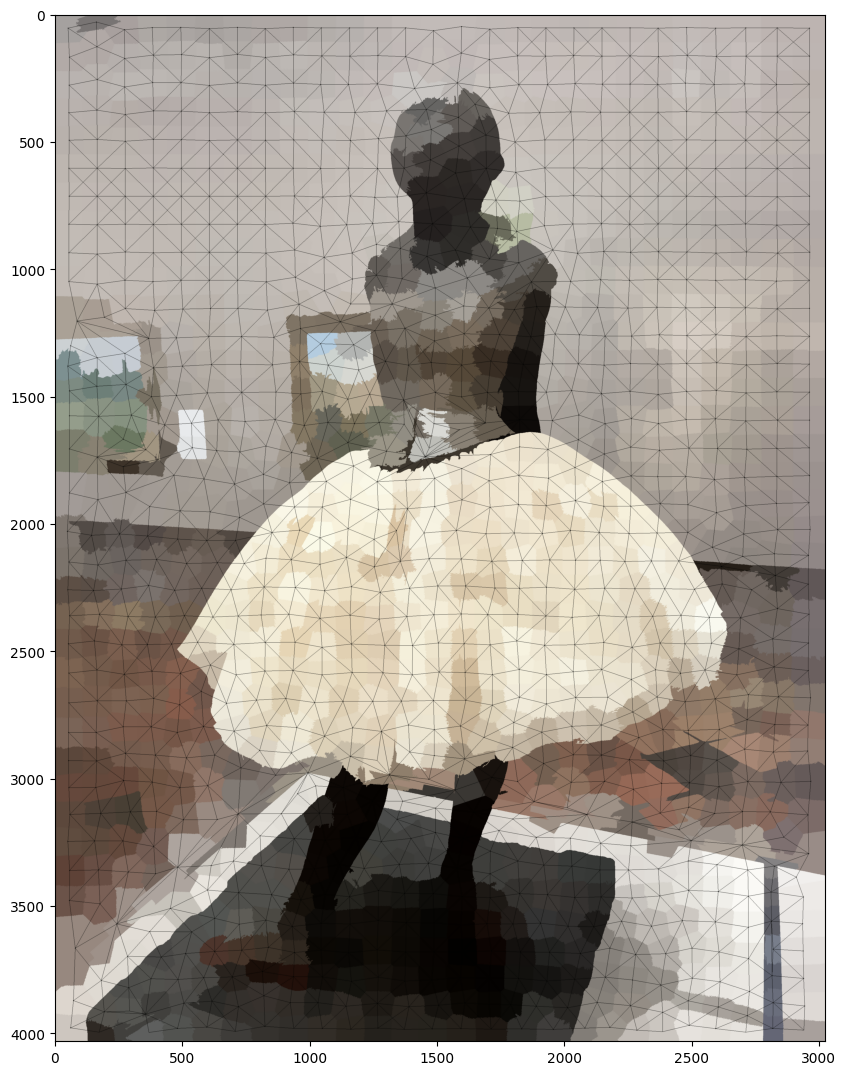

In [10]:
rag = graph.rag_mean_color(A, labels)

for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']

edges_drawn_all = display_edges(label_rgb, rag, np.inf )
show_img(edges_drawn_all)

In [12]:
from skimage import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt

img = Image.open("LittleDancer.jpg")
img = np.asarray(img)
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=300, start_label=1)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

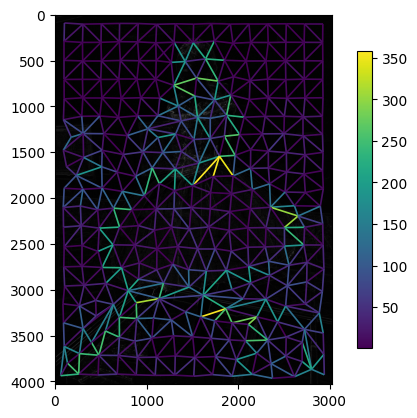

In [15]:
g = graph.rag_mean_color(img, labels)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
plt.show()